In [1]:
!pip install tensorflow numpy matplotlib

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 2.6 MB/s eta 0:02:23
   ---------------------------------------- 0.3/377.0 MB 3.2 MB/s eta 0:02:00
   ---------------------------------------- 0.4/377.0 MB 3.5 MB/s eta 0:01:47
   ---------------------------------------- 0.6/377.0 MB 3.5 MB/s eta 0:01:47
   ---------------------------------------- 0.8/377.0 MB 3.7 MB/s eta 0:01:43
   ---------------------------------------- 1.0/377.0 MB 3.8 MB/s eta 0:01:39
   ---------------------------------------- 1.2/377.0 MB 4.1 MB/s eta 0:01:33
   ---------------------------------------- 1.5/377.0 MB 4.3 MB/s eta 0:01:28
   ---------------------------------------- 1.8/377.0 MB 4.5 MB/s eta 0:01:24
   ---------------------------------------- 2.1/377.0 MB 4.7 MB/s eta 0:01:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_image(image_path, target_size=(256, 256)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    return img_array

# Example: Loading one image (you can load your dataset similarly)
image_path = "D:\\S2A_MSIL2A_20230414T161831_N0509_R040_T17TNJ_20230415T001100.SAFE\\GRANULE\\L2A_T17TNJ_A040792_20230414T162739\\IMG_DATA\\R10m\\cropped_pngs\\debug_0_12.jpeg"
image = load_and_preprocess_image(image_path)


In [3]:
import tensorflow_hub as hub

# Load a pre-trained EDSR model from TensorFlow Hub
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")

def upscale_image(image):
    img = tf.convert_to_tensor(image, dtype=tf.float32)
    img = tf.expand_dims(img, 0)  # Add batch dimension
    upscaled_img = model(img)
    upscaled_img = tf.squeeze(upscaled_img, 0)  # Remove batch dimension
    return upscaled_img.numpy()

# Example: Upscaling one image
upscaled_image = upscale_image(image)

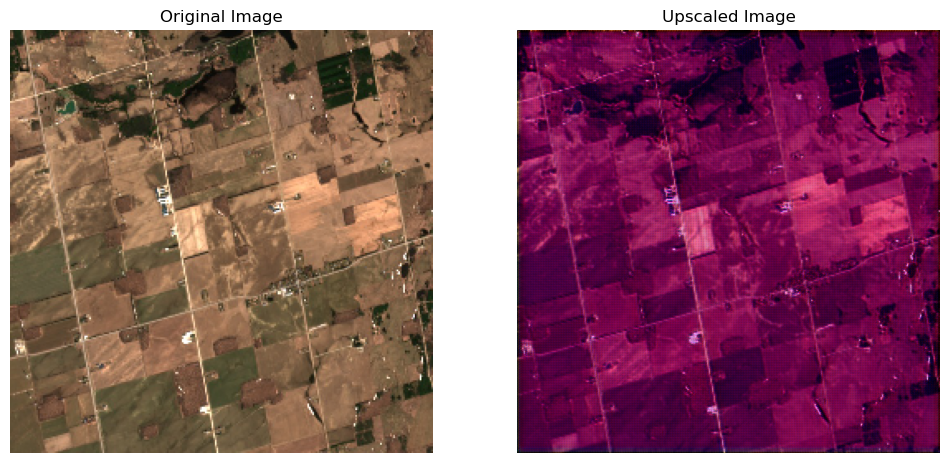

In [4]:
import matplotlib.pyplot as plt

def plot_images(original, upscaled):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Upscaled Image')
    plt.imshow(upscaled)
    plt.axis('off')

    plt.show()

# Example: Plotting the original and upscaled images
plot_images(image, upscaled_image)

In [5]:
def save_image(image, path):
    # Convert from normalized [0, 1] to [0, 255] range
    image = (image * 255).astype(np.uint8)
    tf.keras.preprocessing.image.save_img(path, image)

save_image(upscaled_image, 'upscaled_satellite_image.tif')

In [1]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [2]:
# Declaring Constants
IMAGE_PATH = "E:\sample-001\sr_cropped\debug_2_1.jpeg"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

In [3]:
def preprocess_image(image_path):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  hr_image = tf.image.decode_image(tf.io.read_file(image_path))
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)


%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """
  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title)

In [4]:
hr_image = preprocess_image(IMAGE_PATH)

Saved as Original Image.jpg


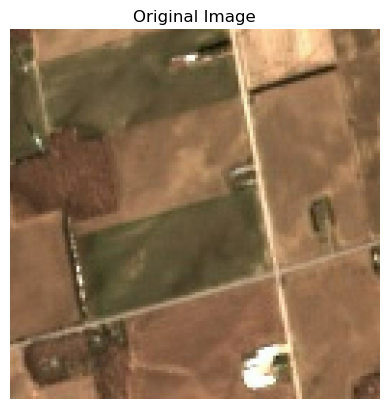

In [5]:
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")

In [6]:
model = hub.load(SAVED_MODEL_PATH)

In [7]:
start = time.time()
fake_image = model(hr_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 7284.735827


Saved as Super Resolution.jpg


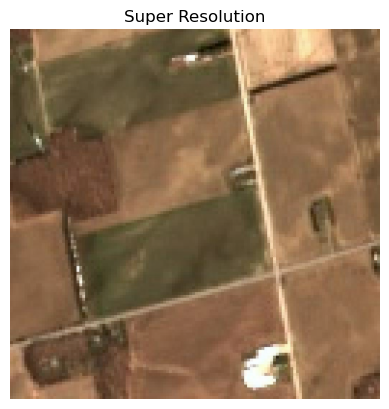

In [8]:
plot_image(tf.squeeze(fake_image), title="Super Resolution")
save_image(tf.squeeze(fake_image), filename="Super Resolution")